In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/machine_learning_challenge/ML-challenge/EX_challenging_problems/03_power_consumption_prediction/TetuanCityPowerConsumption.csv")
print(df)

       Temperature  Humidity  Wind Speed  general diffuse flows  \
0            6.559      73.8       0.083                  0.051   
1            6.414      74.5       0.083                  0.070   
2            6.313      74.5       0.080                  0.062   
3            6.121      75.0       0.083                  0.091   
4            5.921      75.7       0.081                  0.048   
...            ...       ...         ...                    ...   
52411        7.010      72.4       0.080                  0.040   
52412        6.947      72.6       0.082                  0.051   
52413        6.900      72.8       0.086                  0.084   
52414        6.758      73.0       0.080                  0.066   
52415        6.580      74.1       0.081                  0.062   

       diffuse flows  Zone 1 Power Consumption  
0              0.119               34055.69620  
1              0.085               29814.68354  
2              0.100               29128.10127  

In [ ]:
data   = df[["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]].to_numpy()
target = df["Zone 1 Power Consumption"].to_numpy()

In [ ]:
print(data.shape)
print(target.shape)

(52416, 5)
(52416,)


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.1);

In [ ]:
print(train_target)

[25405.03311 32425.85551 30471.22924 ... 42197.46835 23630.76923
 25736.17021]


In [ ]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# ss.fit(train_input)
# train_scaled = ss.transform(train_input)
# test_scaled  = ss.transform(test_input)

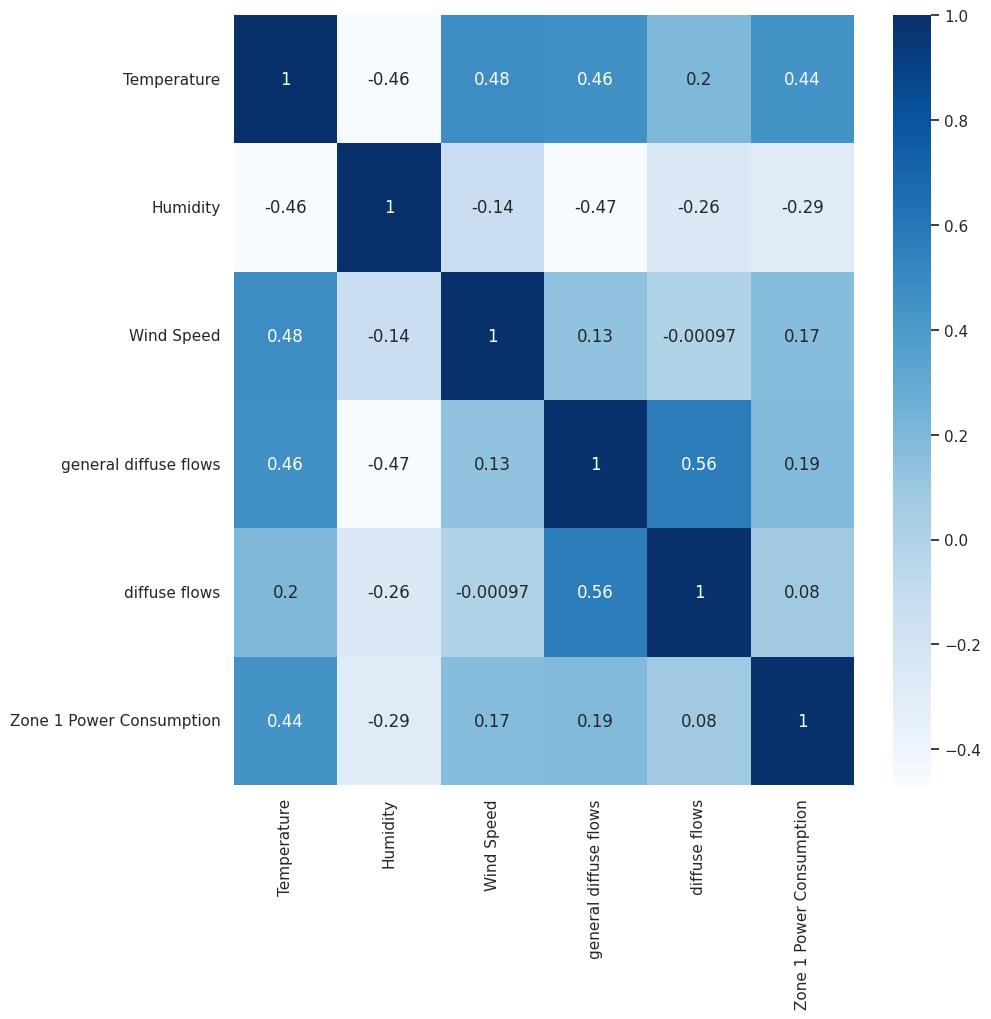

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()

# heatmap to express correlation
plt.figure(figsize = (10,10))
sns.set(font_scale = 1)
sns.heatmap(correlation, annot = True, cbar = True, cmap="Blues")
plt.show()

Whether or not an RMSLE value of 0.2 is good enough depends on the specific application. In general, a lower RMSLE value is better, but there is no single "ideal" value. For example, an RMSLE value of 0.2 might be considered good enough for a predictive model that is used to make general estimates, but it might not be good enough for a model that is used to make critical decisions.

Here are some examples of RMSLE values that are considered to be good enough for different applications:

* **Logistic regression:** An RMSLE value of 0.2 or less is generally considered to be good enough for logistic regression models.
* **Decision trees:** An RMSLE value of 0.1 or less is generally considered to be good enough for decision tree models.
* **Random forests:** An RMSLE value of 0.05 or less is generally considered to be good enough for random forest models.

It is important to note that these are just general guidelines. The specific RMSLE value that is considered to be good enough will vary depending on the specific application.

Here are some additional factors that can affect the acceptability of an RMSLE value:

* The size of the dataset. A lower RMSLE value is generally required for smaller datasets.
* The complexity of the model. A more complex model will typically require a lower RMSLE value.
* The importance of the application. A lower RMSLE value is generally required for applications where the accuracy of the predictions is critical.

### SVR (Support Vector Regression)

In [ ]:
# SVM (Support Vector Machine) but Regression
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(train_input, train_target)

In [16]:
SVR_prediction = SVR.predict(test_input)

In [17]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

print(f"MSE: {mean_squared_error(SVR_prediction, test_target)}")
print(f"RMSE: {mean_squared_error(SVR_prediction, test_target) ** 0.5}")
print(f"RMSLE: {mean_squared_log_error(SVR_prediction, test_target) ** 0.5}")
print(f"R^2: {SVR.score(test_input, test_target)}")

MSE: 49319940.617018335
RMSE: 7022.815718571742
RMSLE: 0.21724957900983538
R^2: 0.025655146311694854


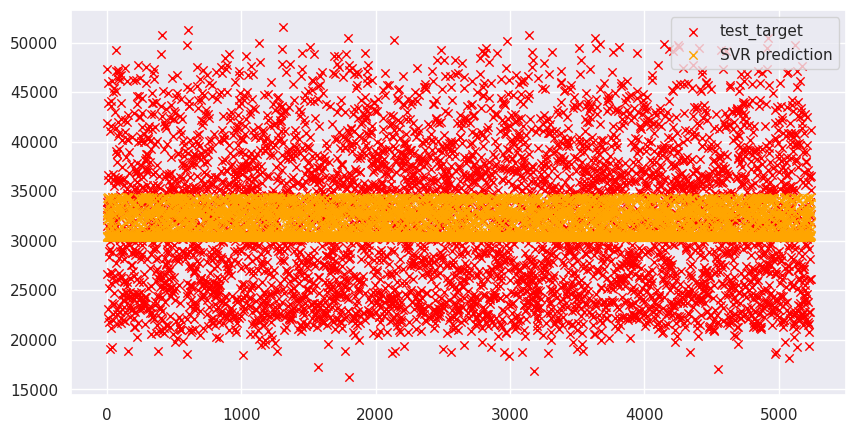

In [53]:
plt.figure(figsize = (10, 5))

plt.scatter([x for x in range(len(test_target))], test_target, label = "test_target", color = "red", marker = "x", linewidth = 1)
plt.scatter([x for x in range(len(test_target))], SVR_prediction, label = "SVR prediction", color = "orange", marker = "x", linewidth = 1)
plt.legend()
plt.show()

# Looks too inaccurate

### DTR (Decision Tree Regression)

In [56]:
# DTR(Decision Tree Regression)
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(train_input, train_target)

DecisionTreeRegressor()

In [57]:
DTR_prediction = DTR.predict(test_input)

In [58]:
print(f"MSE: {mean_squared_error(DTR_prediction, test_target)}")
print(f"RMSE: {mean_squared_error(DTR_prediction, test_target) ** 0.5}")
print(f"RMSLE: {mean_squared_log_error(DTR_prediction, test_target) ** 0.5}")
print(f"R^2: {SVR.score(test_input, test_target)}")

MSE: 40842650.249104306
RMSE: 6390.82547478057
RMSLE: 0.20056763947035608
R^2: 0.025655146311694854


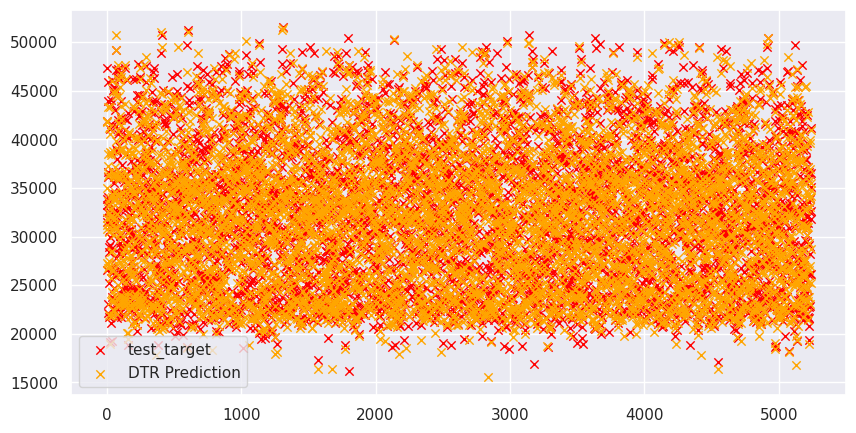

In [59]:
plt.figure(figsize = (10, 5))

plt.scatter([x for x in range(len(test_target))], test_target, label = "test_target", color = "red", marker = "x", linewidth = 1)
plt.scatter([x for x in range(len(test_target))], DTR_prediction, label = "DTR Prediction", color = "orange", marker = "x", linewidth = 1)
plt.legend()
plt.show()

### RFR (Random Forest Regression)

In [60]:
# RF (Random Forest) regression
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(train_input, train_target)

RandomForestRegressor()

In [61]:
RFR_prediction = RFR.predict(test_input)

In [62]:
print(f"MSE: {mean_squared_error(RFR_prediction, test_target)}")
print(f"RMSE: {mean_squared_error(RFR_prediction, test_target) ** 0.5}")
print(f"RMSLE: {mean_squared_log_error(RFR_prediction, test_target) ** 0.5}")
print(f"R^2: {SVR.score(test_input, test_target)}")

MSE: 20904001.27208933
RMSE: 4572.089377088918
RMSLE: 0.1454560757563599
R^2: 0.025655146311694854


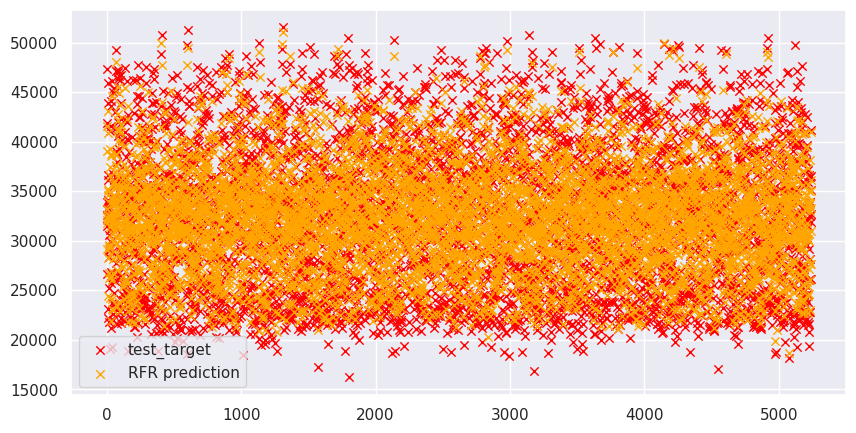

In [64]:
plt.figure(figsize = (10, 5))

plt.scatter([x for x in range(len(test_target))], test_target, label = "test_target", color = "red", marker = "x", linewidth = 1)
plt.scatter([x for x in range(len(test_target))], RFR_prediction, label = "RFR prediction", color = "orange", marker = "x", linewidth = 1)
plt.legend()
plt.show()

### LR (Linear Regression)

In [65]:
# LR(Linear Regression)
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(train_input, train_target)

LinearRegression()

In [66]:
LR_prediction = LR.predict(test_input)

In [67]:
print(f"MSE: {mean_squared_error(LR_prediction, test_target)}")
print(f"RMSE: {mean_squared_error(LR_prediction, test_target) ** 0.5}")
print(f"RMSLE: {mean_squared_log_error(LR_prediction, test_target) ** 0.5}")
print(f"R^2: {SVR.score(test_input, test_target)}")

MSE: 40434264.5770271
RMSE: 6358.794270695278
RMSLE: 0.1993635069284196
R^2: 0.025655146311694854


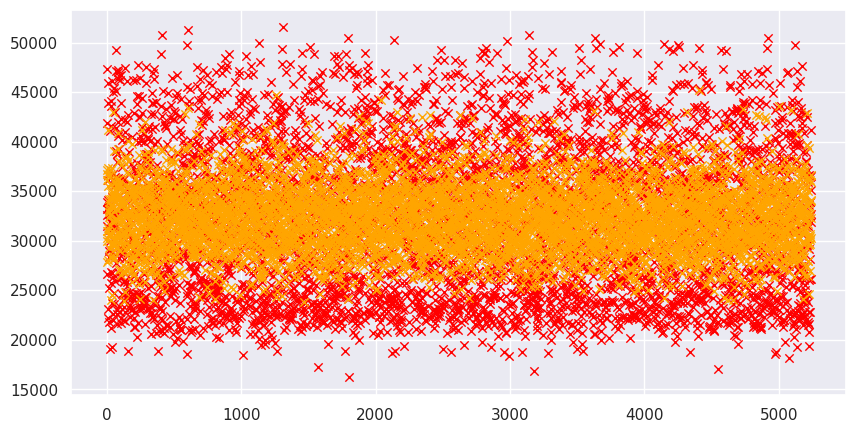

In [68]:
plt.figure(figsize = (10, 5))

plt.scatter([x for x in range(len(test_target))], test_target, label = "test_target", color = "red", marker = "x", linewidth = 1)
plt.scatter([x for x in range(len(test_target))], LR_prediction, label = "LR prediction", color = "orange", marker = "x", linewidth = 1)
plt.show()